Fit a basic logistic regression model, save useful columns to plot in an app

In [22]:
#Data Fitting of Healthgrades data
import pandas as pd
import seaborn as sns
import math
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [23]:
df = pd.read_pickle('HealthgradesNymagClean.pkl')
#convert number of publications to float
df.Number_pub = df.Number_pub.astype(float)
#shuffle dataframe
df = df.sample(frac=1)
#add intercept column
df['intercept']= 1.0

In [24]:
#use isrecommended provider column, convert nans to 0
is_rec = df.isRecommendedProvider*1.0
is_rec = is_rec.fillna(0.0)
df['is_Rec'] = is_rec

In [25]:
#split into test and training set
df_train = df.iloc[:289]
df_test = df.iloc[289:]

In [26]:

# identify the independent variables 

ind_cols=['Number_pub','is_Rec','surveyOverallRatingScore','intercept']
logit = sm.Logit(df_train.isbest, df_train[ind_cols])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.153073
         Iterations 9


In [27]:
# get the fitted coefficients from the results
coeff_fit = result.params
print(coeff_fit)

Number_pub                  0.013367
is_Rec                     -1.679009
surveyOverallRatingScore    0.367999
intercept                  -5.249915
dtype: float64


In [28]:
df_test

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,fullname,isbest,Number_pub,intercept,is_Rec
displayName,,,,,,,,,,,,,,,,,,,,,
"Dr. Gabriella D'Andrea, MD","Dr. Gabriella D'Andrea, MD is an Oncology Spec...",1275 York Ave,"New York, NY 10065",[HGSTF40A7B36330154],53.0,F,False,0,call,NaN,...,60.0,6.0,6.0,14.0,27.0,Gabriella D'Andrea,False,27.0,1.0,0.0
"Dr. Ted Szatrowski, MD","Dr. Ted Szatrowski, MD is a Hematology Special...",525 E 68th St,"New York, NY 10065",NaN,62.0,M,False,0,call,NaN,...,NaN,0.0,0.0,NaN,35.0,Ted Szatrowski,False,5.0,1.0,0.0
"Dr. John MacDonald, MD","Dr. John MacDonald, MD is an Oncology Speciali...",325 W 15th St,"New York, NY 10011",NaN,75.0,M,False,0,call,NaN,...,NaN,0.0,0.0,NaN,49.0,John MacDonald,False,71.0,1.0,0.0
"Dr. Bishoy Faltas, MD",Dr. Bishoy Morris Faltas is an Assistant Profe...,520 E 70th St Ste 341,"New York, NY 10021",[HGST750A7B36330101],38.0,M,False,7,call,"[{'productGroupCode': 'PDC', 'productCode': 'P...",...,NaN,0.0,0.0,NaN,NaN,Bishoy Faltas,False,20.0,1.0,0.0
"Dr. Theresa Shao, MD","Dr. Theresa Shao, MD is a Hematology Specialis...",325 W 15th St Ste J,"New York, NY 10011",[HGSTE20A7B36330169],NaN,F,True,0,call,NaN,...,100.0,10.0,10.0,1.0,14.0,Theresa Shao,False,11.0,1.0,1.0
"Dr. David Chung, MD","Dr. David Chung, MD is an Oncology Specialist ...",1275 York Ave Rm H704B,"New York, NY 10065",[HGSTF40A7B36330154],51.0,M,False,0,call,NaN,...,NaN,0.0,0.0,NaN,17.0,David Chung,False,23.0,1.0,0.0
"Dr. Yariv Houvras, MD",Dr. Yariv Houvras is an internationally-renown...,1305 York Ave Fl 12,"New York, NY 10021",[HGST750A7B36330101],48.0,M,False,8,call,"[{'productGroupCode': 'PDC', 'productCode': 'P...",...,NaN,0.0,0.0,NaN,17.0,Yariv Houvras,False,14.0,1.0,0.0
"Dr. Daniel Becker, MD","Dr. Daniel Becker, MD is a Hematology Speciali...",160 E 34th St Fl 8,"New York, NY 10016","[HGST7FF97B36330214, HGSTC80A7B36330046]",42.0,M,True,0,call,NaN,...,100.0,10.0,10.0,1.0,16.0,Daniel Becker,False,24.0,1.0,1.0
"Dr. Marleen Meyers, MD","Dr. Marleen Meyers, MD is an Oncology Speciali...",160 E 34th St Fl 3,"New York, NY 10016",[HGST7FF97B36330214],63.0,F,False,0,call,NaN,...,62.0,6.0,6.0,10.0,39.0,Marleen Meyers,False,0.0,1.0,0.0


In [111]:
#logistic regression sum
output_zval_test= coeff_fit[0]*df_test.Number_pub + coeff_fit[1]*df_test.is_Rec + coeff_fit[2]*df_test.surveyOverallRatingScore + coeff_fit[3]

In [112]:
def prob_z(z):
  # compute the linear expression by multipyling the inputs by their respective coefficients.
  return 1/(1+math.exp(-1*z))

#get true/false output and add to column isbest_predicted

In [113]:
outputprobabilitytest = output_zval_test.apply(prob_z)

In [114]:
def return_TF(prob): 
    if prob>= 0.25: return True
    else: return False

In [118]:
output_isbest = outputprobabilitytest.apply(return_TF)

In [119]:
df_test['isbest_Predicted'] = output_isbest

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [117]:
df_test

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,fullname,isbest,Number_pub,intercept,is_Rec,isbest_Predicted
displayName,,,,,,,,,,,,,,,,,,,,,
"Dr. Gabriella D'Andrea, MD","Dr. Gabriella D'Andrea, MD is an Oncology Spec...",1275 York Ave,"New York, NY 10065",[HGSTF40A7B36330154],53.0,F,False,0,call,NaN,...,6.0,6.0,14.0,27.0,Gabriella D'Andrea,False,27.0,1.0,0.0,False
"Dr. Ted Szatrowski, MD","Dr. Ted Szatrowski, MD is a Hematology Special...",525 E 68th St,"New York, NY 10065",NaN,62.0,M,False,0,call,NaN,...,0.0,0.0,NaN,35.0,Ted Szatrowski,False,5.0,1.0,0.0,False
"Dr. John MacDonald, MD","Dr. John MacDonald, MD is an Oncology Speciali...",325 W 15th St,"New York, NY 10011",NaN,75.0,M,False,0,call,NaN,...,0.0,0.0,NaN,49.0,John MacDonald,False,71.0,1.0,0.0,False
"Dr. Bishoy Faltas, MD",Dr. Bishoy Morris Faltas is an Assistant Profe...,520 E 70th St Ste 341,"New York, NY 10021",[HGST750A7B36330101],38.0,M,False,7,call,"[{'productGroupCode': 'PDC', 'productCode': 'P...",...,0.0,0.0,NaN,NaN,Bishoy Faltas,False,20.0,1.0,0.0,False
"Dr. Theresa Shao, MD","Dr. Theresa Shao, MD is a Hematology Specialis...",325 W 15th St Ste J,"New York, NY 10011",[HGSTE20A7B36330169],NaN,F,True,0,call,NaN,...,10.0,10.0,1.0,14.0,Theresa Shao,False,11.0,1.0,1.0,False
"Dr. David Chung, MD","Dr. David Chung, MD is an Oncology Specialist ...",1275 York Ave Rm H704B,"New York, NY 10065",[HGSTF40A7B36330154],51.0,M,False,0,call,NaN,...,0.0,0.0,NaN,17.0,David Chung,False,23.0,1.0,0.0,False
"Dr. Yariv Houvras, MD",Dr. Yariv Houvras is an internationally-renown...,1305 York Ave Fl 12,"New York, NY 10021",[HGST750A7B36330101],48.0,M,False,8,call,"[{'productGroupCode': 'PDC', 'productCode': 'P...",...,0.0,0.0,NaN,17.0,Yariv Houvras,False,14.0,1.0,0.0,False
"Dr. Daniel Becker, MD","Dr. Daniel Becker, MD is a Hematology Speciali...",160 E 34th St Fl 8,"New York, NY 10016","[HGST7FF97B36330214, HGSTC80A7B36330046]",42.0,M,True,0,call,NaN,...,10.0,10.0,1.0,16.0,Daniel Becker,False,24.0,1.0,1.0,False
"Dr. Marleen Meyers, MD","Dr. Marleen Meyers, MD is an Oncology Speciali...",160 E 34th St Fl 3,"New York, NY 10016",[HGST7FF97B36330214],63.0,F,False,0,call,NaN,...,6.0,6.0,10.0,39.0,Marleen Meyers,False,0.0,1.0,0.0,False


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_true = df_test.isbest
y_pred = df_test.isbest_Predicted
cm = confusion_matrix(y_true, y_pred)
classes = ['isnotbest','isbest']
f = f1_score(y_true,y_pred)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[93  2]
 [ 4  1]]


0.25

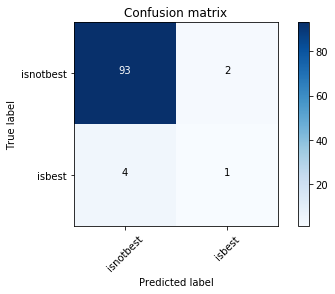

In [62]:
# cm is confusion matrix itself
# classes are labels for the classes/groups
plot_confusion_matrix(cm, classes)
f

In [69]:
specialties = []
for specialitieslist in df.specialistDesc:
    for specialty in specialitieslist:
        if not specialty in specialties: specialties.append(specialty)
specialties

['Oncology Specialist',
 'Internist',
 'Hematology Specialist',
 'Hospice & Palliative Medicine Specialist',
 'Geriatrician',
 'Allergy & Immunology Specialist',
 'Other Provider',
 'Infectious Disease Specialist',
 'Hepatology Specialist',
 'Blood Banking & Transfusion Medicine Specialist',
 'Nephrology Specialist',
 'Radiation Oncology Specialist',
 'Radiologist',
 'Emergency Medicine Specialist',
 'Gynecologic Oncology Specialist',
 'Diagnostic Radiologist',
 'Rheumatology Specialist',
 'Dermatologist']

In [64]:
f


0.25

In [66]:
#add predicted column to df
output_zval= coeff_fit[0]*df.Number_pub + coeff_fit[1]*df.is_Rec + coeff_fit[2]*df.surveyOverallRatingScore + coeff_fit[3]
outputprobability = output_zval.apply(prob_z)
output_isbest = outputprobability.apply(return_TF)
df['isbest_Predicted'] = output_isbest
df_best_pred = df[df.isbest_Predicted]

In [70]:
specialties2 = []
for specialitieslist in df_best_pred.specialistDesc:
    for specialty in specialitieslist:
        if not specialty in specialties2: specialties2.append(specialty)
specialties2

['Oncology Specialist', 'Hematology Specialist', 'Internist']

In [87]:
output = ''
for doctor in df_best_pred.index:
    if 'Internist' in df_best_pred.loc[doctor,'specialistDesc']:
        output += doctor + '\t' + df_best_pred.loc[doctor,'address.line1'] + '\t' + df_best_pred.loc[doctor,'address.line2']+'\n'
print(output)


Dr. Owen O'Connor, MD	51 W 51st St # 200	New York, NY 10019
Dr. Larry Norton, MD	1275 York Ave	New York, NY 10065
Dr. Jedd Wolchok, MD	1275 York Ave	New York, NY 10065
Praddep Chandra, MB	1545 Atlantic Ave	Brooklyn, NY 11213
Dr. Mark Robson, MD	300 E 66th St Fl 5	New York, NY 10065
Dr. Hitendrakumar Upadhyaya, MD	282 Saint Pauls Ave	Jersey City, NJ 07306
Dr. Martin Tallman, MD	1275 York Ave	New York, NY 10065
Dr. Mark Kris, MD	300 E 66th St	New York, NY 10065
Dr. Anas Younes, MD	1275 York Ave	New York, NY 10065
Dr. Nancy Kemeny, MD	300 E 66th St	New York, NY 10065
Dr. Vincent Miller, MD	300 E 66th St	New York, NY 10065
Dr. Aftabahmed Shaikh, MD	30 Saint James Pl Ste 2	Brooklyn, NY 11205
Dr. Leonard Saltz, MD	300 E 66th St	New York, NY 10065



In [71]:
with open("logregmodel.pkl","wb") as f:
    pickle.dump(df, f)
    pickle.dump(specialties, f)
    pickle.dump(coeff_fit,f)

In [120]:
import sklearn 
fpr, tpr, thresholds = sklearn.metrics.roc_curve(df_test.isbest, outputprobabilitytest, pos_label=None, sample_weight=None, drop_intermediate=True)
roc_auc = sklearn.metrics.roc_auc_score(df.isbest, outputprobability)

In [121]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0,0.5,'True Positive Rate')

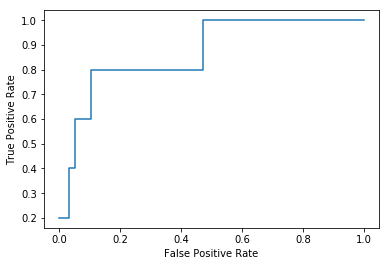

In [123]:
plt.plot(fpr,tpr,label= 'ROC AUC curve test' %roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [101]:
roc_auc = sklearn.metrics.auc(fpr,tpr)

In [124]:
f

<_io.BufferedWriter name='logregmodel.pkl'>